<a href="https://colab.research.google.com/github/gustapfp/intro-ml/blob/main/hours_per_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd

data = pd.read_csv('https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv')

In [58]:
data.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [59]:
change = {
    0:1,
    1:0
}
data['finished'] = data.unfinished.map(change)
data.head()

,unfinished,expected_hours,price,finished
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


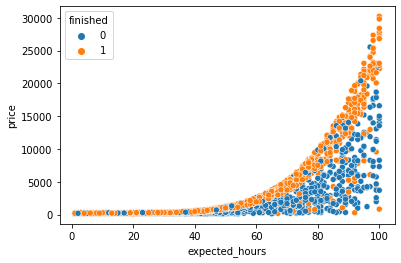

In [60]:
import seaborn as sns

sns.scatterplot(x='expected_hours', y='price', data=data, hue='finished')


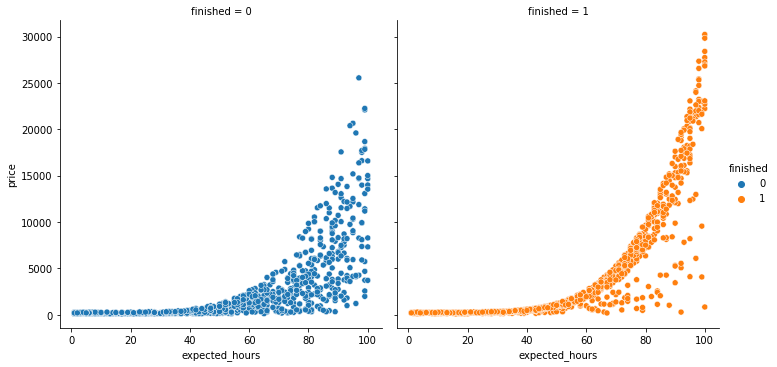

In [61]:
sns.relplot(x='expected_hours', y='price', data=data, hue='finished', col='finished')

In [62]:
data

,unfinished,expected_hours,price,finished
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0
...,...,...,...,...
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1


In [89]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

SEED = 5

x = data[['expected_hours', 'price']]
y = data['unfinished']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = SEED, test_size = 0.25, stratify=y) 
model = LinearSVC()
model.fit(x_train, y_train)
predictions = model.predict(x_test)

acy_sre = accuracy_score(y_test, predictions)
print(f"The accuracy score of this model is: {(acy_sre)*100}")

The accuracy score of this model is: 48.888888888888886


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [90]:
import numpy as np

base_predictions = np.ones(540)
base_predictions = accuracy_score(y_test, base_predictions)
print(f"The base line accuracy score model is: {(base_predictions)*100}")

The base line accuracy score model is: 47.40740740740741


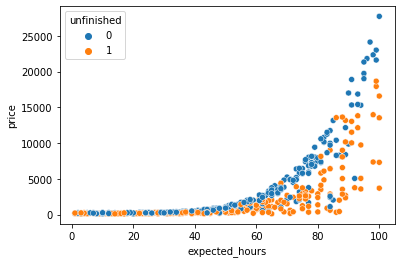

In [91]:
sns.scatterplot(x='expected_hours', y='price', data=x_test, hue=y_test)

In [92]:
y_min = x_test.price.min()
y_max = x_test.price.max()

x_min = x_test.expected_hours.min()
x_max = x_test.expected_hours.max()

In [93]:
pixels = 100
x_axis = np.arange(x_min, x_max, (x_max-x_min) / pixels)
y_axis = np.arange(y_min, y_max, (y_max-y_min) / pixels)

In [94]:
xx, yy = np.meshgrid(x_axis, y_axis) 
dots = np.c_[xx.ravel(), yy.ravel()]
z = model.predict(dots)
z= z.reshape(xx.shape)

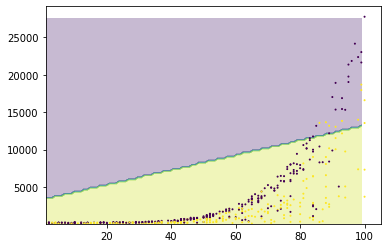

In [95]:
import matplotlib.pyplot as plt
plt.contourf(xx,yy,z,alpha=0.3)
plt.scatter(x_test.expected_hours, x_test.price, c=y_test, s=1)